In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

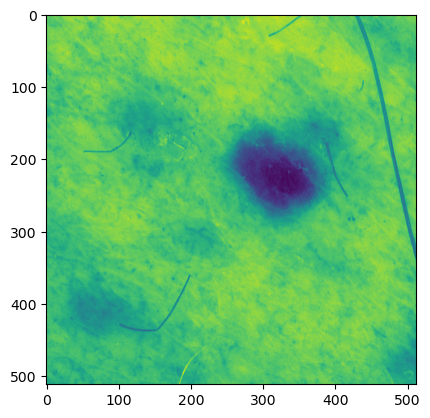

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

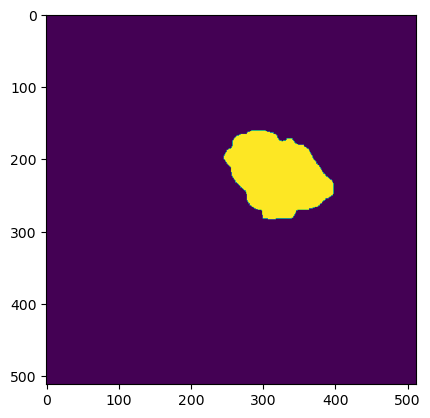

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp8iywmt74kuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp8iywmt74kuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 25

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 37s 690ms/step - loss: 0.5426 - dice_coeff: 0.3099 - val_loss: 0.5210 - val_dice_coeff: 0.3512
Epoch 2/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4922 - dice_coeff: 0.3605 - val_loss: 0.4551 - val_dice_coeff: 0.4181
Epoch 3/100
39/39 [==============================] - 19s 485ms/step - loss: 0.4350 - dice_coeff: 0.4551 - val_loss: 0.4358 - val_dice_coeff: 0.5204
Epoch 4/100
39/39 [==============================] - 19s 487ms/step - loss: 0.4136 - dice_coeff: 0.5137 - val_loss: 0.4319 - val_dice_coeff: 0.5086
Epoch 5/100
39/39 [==============================] - 19s 496ms/step - loss: 0.4388 - dice_coeff: 0.4931 - val_loss: 0.4094 - val_dice_coeff: 0.5401
Epoch 6/100
39/39 [==============================] - 19s 493ms/step - loss: 0.4117 - dice_coeff: 0.5193 - val_loss: 0.4286 - val_dice_coeff: 0.5314
Epoch 7/100
39/39 [==============================] - 19s 485ms/step - loss: 0.4132 - dice_coeff: 0.52

24/24 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 363 machine labels.
Replacing 121 from 363 !
D_relabeled_ 121
point ids 121
Removed: 121 Filled: 121
TOOK 354.8608078956604 seconds
***
RUN: 6
Epoch 1/100
86/86 [==============================] - 38s 440ms/step - loss: 0.4211 - dice_coeff: 0.5342 - val_loss: 0.4199 - val_dice_coeff: 0.5566
Epoch 2/100
86/86 [==============================] - 31s 367ms/step - loss: 0.4167 - dice_coeff: 0.5384 - val_loss: 0.4041 - val_dice_coeff: 0.5645
Epoch 3/100
86/86 [==============================] - 32s 369ms/step - loss: 0.4209 - dice_coeff: 0.5377 - val_loss: 0.4068 - val_dice_coeff: 0.5418
Epoch 4/100
86/86 [==============================] - 32s 371ms/step - loss: 0.4200 - dice_coeff: 0.5375 - val_loss: 0.4204 - val_dice_coeff: 0.5318
Model saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_6kuc_unet2d_model
History saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_history_6.pkl
Testing the classifier...

125/125 [==============================] - 41s 332ms/step - loss: 0.3972 - dice_coeff: 0.5661 - val_loss: 0.3751 - val_dice_coeff: 0.5670
Model saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_11kuc_unet2d_model
History saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_history_11.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 383 machine labels.
Replacing 127 from 383 !
D_relabeled_ 127
point ids 127
Removed: 127 Filled: 127
TOOK 597.2830839157104 seconds
***
RUN: 12
Epoch 1/100
133/133 [==============================] - 44s 333ms/step - loss: 0.4031 - dice_coeff: 0.5607 - val_loss: 0.3722 - val_dice_coeff: 0.5908
Epoch 2/100
133/133 [==============================] - 44s 329ms/step - loss: 0.3970 - dice_coeff: 0.5705 - val_loss: 0.3732 - val_dice_coeff: 0.5735
Epoch 3/100
133/133 [==============================] - 44s 330ms/step - loss: 0.3958 - dice_coeff: 0.5713 - val_loss: 0.3

170/170 [==============================] - 53s 313ms/step - loss: 0.3729 - dice_coeff: 0.5925 - val_loss: 0.3579 - val_dice_coeff: 0.6119
Epoch 6/100
170/170 [==============================] - 53s 314ms/step - loss: 0.3727 - dice_coeff: 0.5948 - val_loss: 0.3628 - val_dice_coeff: 0.5913
Model saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_17kuc_unet2d_model
History saved to: /tmp/tmp8iywmt74kuc_unet2d/kuc_unet2d_history_17.pkl
Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 369 machine labels.
Replacing 123 from 369 !
D_relabeled_ 123
point ids 123
Removed: 123 Filled: 123
TOOK 478.83658266067505 seconds
***
RUN: 18
Epoch 1/100
178/178 [==============================] - 57s 319ms/step - loss: 0.3737 - dice_coeff: 0.5933 - val_loss: 0.3613 - val_dice_coeff: 0.5984
Epoch 2/100
178/178 [==============================] - 55s 311ms/step - loss: 0.3729 - dice_coeff: 0.5942 - val_loss: 0.

ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
R.classifier_scores # after 20 runs of GP2

In [ ]:
R.discriminator_scores # after 20 runs of GP2

In [ ]:
R.plot() # after 20 runs of GP2

In [ ]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 20 runs of GP2